In [241]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.metrics import plot_roc_curve

In [242]:
df=pd.read_csv("train.csv")

In [243]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA DICTIONARY

1.Survived => 0 : no / 1 : yes

2.Pclass (Class Ticket) => 1 : 1st / 2 : 2nd / 3 : 3rd

3.Name

4.Sex => 0 : man / 1 : woman

5.Age

6.Sibsp (of siblings / spouses aboard the Titanic)

7.Parch (of parents / children aboard the Titanic)

8.Ticket (Ticket Number)

9.Fare (Passenger Fare)

10.Cabin (cabin Number)

11.Embarked (Port of Embarkation) => C : Cherbourg / Q = Queenstown / S = Southampton



In [244]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
highest_fare = df["Fare"].max()
highest_fare

512.3292

In [247]:
bins = pd.cut(df['Fare'], [0, 10, 40,75 ,150 ,200 ,600])
df.groupby(bins)["Survived"].value_counts().unstack()

Survived,0,1
Fare,,
"(0, 10]",255,66
"(10, 40]",217,162
"(40, 75]",40,39
"(75, 150]",14,54
"(150, 200]",3,6
"(200, 600]",6,14


In [248]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
bins_1 = pd.cut(df['Age'], [0, 3, 5,15 ,20 ,50 ,90])
df.groupby(bins_1)["Survived"].value_counts().unstack()

Survived,0,1
Age,,
"(0, 3]",10,20
"(3, 5]",3,11
"(5, 15]",21,18
"(15, 20]",63,33
"(20, 50]",285,186
"(50, 90]",42,22


In [250]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Filling Missing Values

In [251]:
df["Age"].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(value="S", inplace=True)
df['Cabin'].fillna(value="Unkn", inplace=True)

In [252]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [253]:
bins_1 = pd.cut(df['Age'], [0, 3, 5,15 ,20 ,50 ,90])
df.groupby(bins_1)["Survived"].value_counts().unstack()

Survived,0,1
Age,,
"(0, 3]",10,20
"(3, 5]",3,11
"(5, 15]",21,18
"(15, 20]",63,33
"(20, 50]",410,238
"(50, 90]",42,22


In [254]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unkn,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unkn,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unkn,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unkn,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unkn,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Visualization

In [255]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [256]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unkn,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unkn,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unkn,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unkn,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unkn,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Fare', ylabel='Count'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


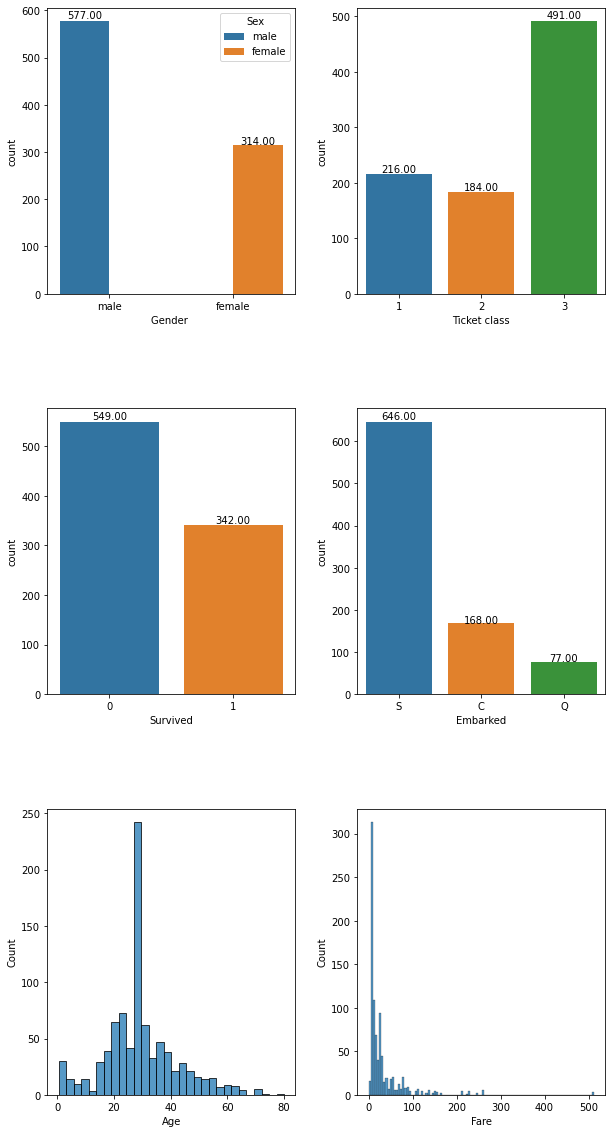

In [257]:
##Analysing Various Labels Using countplot


fig, ax = plt.subplots(3,2,figsize=(10,20)) # creating multi plot (3*2) with figure size of (10,14)
fig.subplots_adjust(hspace=0.4, wspace=0.25) #Adjusting  space between charts

show_values(sns.countplot(x='Sex',data=df,ax=ax[0,0],hue ="Sex"))
ax[0,0].set(xlabel = "Gender ")

show_values(sns.countplot(x='Pclass',data=df,ax=ax[0,1]))
ax[0,1].set(xlabel = "Ticket class")

show_values(sns.countplot(x='Survived',data=df,ax=ax[1,0]))
ax[1,0].set(xlabel = "Survived")

show_values(sns.countplot(x='Embarked',data =df , ax= ax[1,1]))

sns.histplot(x = 'Age' ,data = df , ax = ax[2,0])


sns.histplot(x = 'Fare' ,data = df , ax = ax[2,1])


<AxesSubplot:>

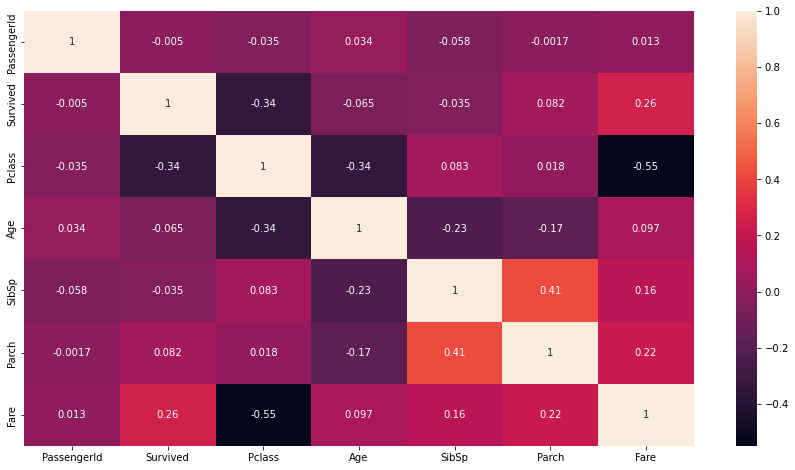

In [258]:
fig , ax =plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(),annot = True , cmap ="rocket")

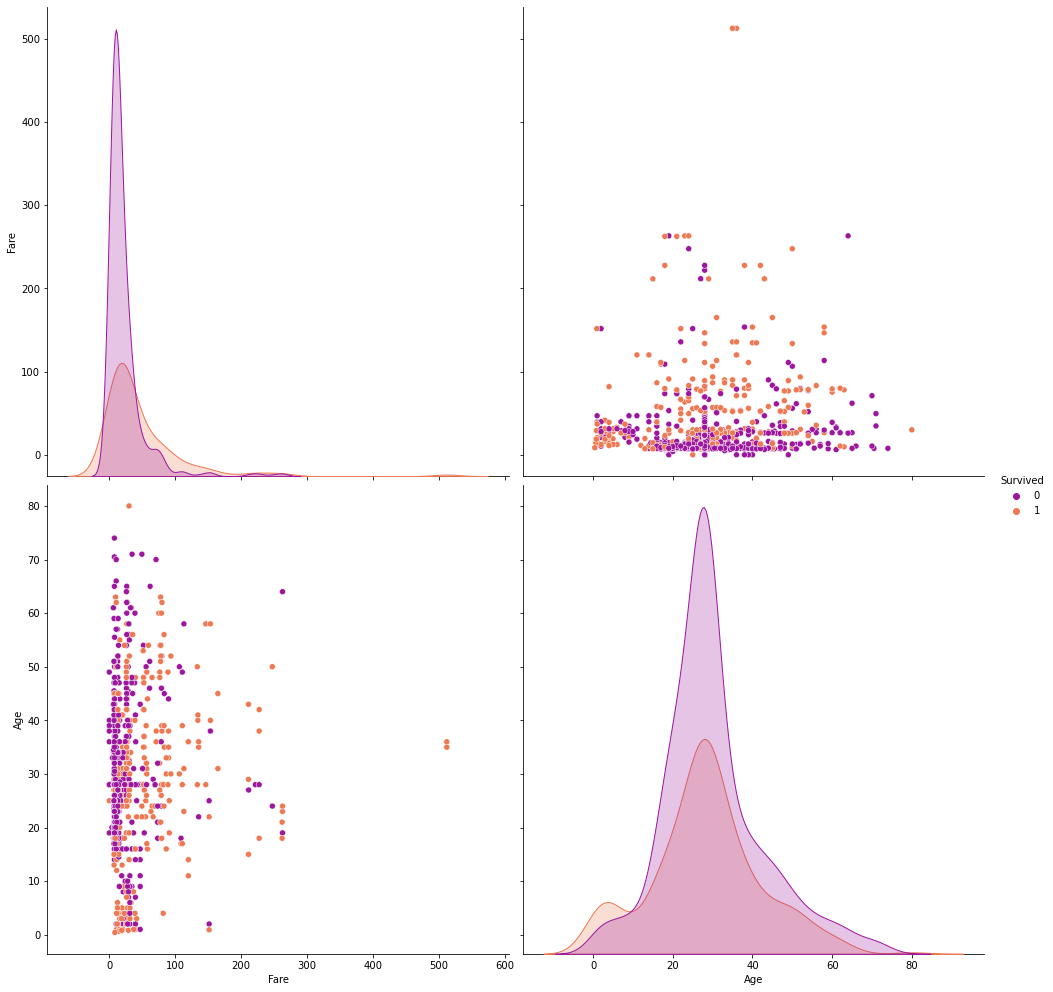

In [259]:
sns.pairplot(df , hue="Survived" ,vars=["Fare","Age"] , height =7 , palette ="plasma")

# Converting Object to Category && Float to int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [261]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [262]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [263]:
for label, content in df.items():
    if pd.api.types.is_float_dtype(content):
        df[label] = content.astype("int64")

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    int64   
 10  Cabin        891 non-null    category
 11  Embarked     891 non-null    category
dtypes: category(5), int64(7)
memory usage: 122.0 KB


# Turn categorical variables into numbers

In [265]:

for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1  

In [266]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22,1,0,524,7,148,3
1,2,1,1,191,1,38,1,0,597,71,82,1
2,3,1,3,354,1,26,0,0,670,7,148,3
3,4,1,1,273,1,35,1,0,50,53,56,3
4,5,0,3,16,2,35,0,0,473,8,148,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27,0,0,102,13,148,3
887,888,1,1,304,1,19,0,0,15,30,31,3
888,889,0,3,414,1,28,1,2,676,23,148,3
889,890,1,1,82,2,26,0,0,9,30,61,1


# Modelling

In [267]:
#split data into X and y
X = df.drop("Survived" , axis=1)

y = df["Survived"]

In [268]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,109,2,22,1,0,524,7,148,3
1,2,1,191,1,38,1,0,597,71,82,1
2,3,3,354,1,26,0,0,670,7,148,3
3,4,1,273,1,35,1,0,50,53,56,3
4,5,3,16,2,35,0,0,473,8,148,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,2,27,0,0,102,13,148,3
887,888,1,304,1,19,0,0,15,30,31,3
888,889,3,414,1,28,1,2,676,23,148,3
889,890,1,82,2,26,0,0,9,30,61,1


In [269]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [270]:
np.random.seed(42)

#split data into train & test 
X_train ,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2)

In [271]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "gnb" : GaussianNB(),
          "decision_tree" : DecisionTreeClassifier(random_state=0, max_depth=2)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [272]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7374301675977654,
 'KNN': 0.6703910614525139,
 'Random Forest': 0.8324022346368715,
 'gnb': 0.8044692737430168,
 'decision_tree': 0.7653631284916201}

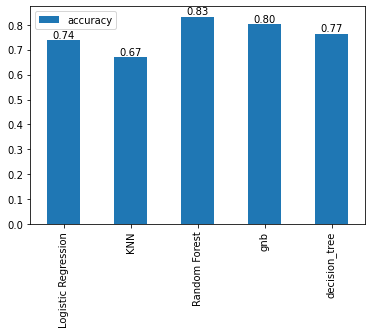

In [273]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
show_values(model_compare.T.plot.bar());

In [274]:
np.random.seed(42)
cv_acc_log = cross_val_score(LogisticRegression(), X, y, cv=20, scoring="accuracy").mean()
cv_acc_gnb =cross_val_score(GaussianNB(), X, y, cv=20, scoring="accuracy").mean()
cv_acc_rnd =cross_val_score(RandomForestClassifier(), X, y, cv=20, scoring="accuracy").mean()

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [275]:
cross_val = { "Logisticregression" : cv_acc_log ,
              "Gaussiannb" :cv_acc_gnb,
               "RandomForestclssifier " : cv_acc_rnd }

cross_val

{'Logisticregression': 0.7644444444444445,
 'Gaussiannb': 0.7823737373737374,
 'RandomForestclssifier ': 0.8372979797979798}

# Hyperparameter Tuning

In [276]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [277]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=10,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [278]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8156424581005587

In [279]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [280]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

# Roc Curve

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


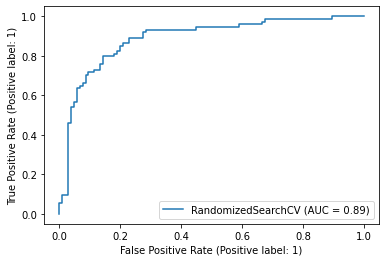

In [281]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test)

# Confusion Matrix

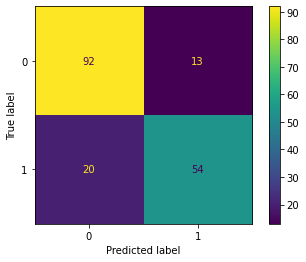

In [282]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

# Classification Report

In [283]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# Evaluation 

In [284]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [285]:
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 81.56%
Precision: 0.81
Recall: 0.73
F1 score: 0.77


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.73, 'f1': 0.77}

# Feature Importance

In [286]:
clf = RandomForestClassifier(n_estimators= 310,
 min_samples_split= 12,
 min_samples_leaf= 15,
 max_depth= None)

clf.fit(X_train, y_train);

Feature: 0, Score: 0.03244
Feature: 1, Score: 0.10217
Feature: 2, Score: 0.03750
Feature: 3, Score: 0.45291
Feature: 4, Score: 0.05504
Feature: 5, Score: 0.01621
Feature: 6, Score: 0.01596
Feature: 7, Score: 0.10667
Feature: 8, Score: 0.08796
Feature: 9, Score: 0.07584
Feature: 10, Score: 0.01730


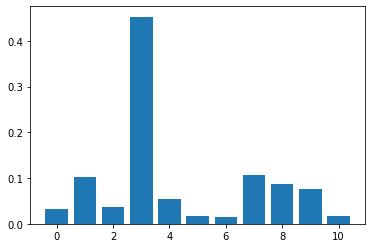

In [287]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

importance = clf.feature_importances_

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [288]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,109,2,22,1,0,524,7,148,3
1,2,1,191,1,38,1,0,597,71,82,1
2,3,3,354,1,26,0,0,670,7,148,3
3,4,1,273,1,35,1,0,50,53,56,3
4,5,3,16,2,35,0,0,473,8,148,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,2,27,0,0,102,13,148,3
887,888,1,304,1,19,0,0,15,30,31,3
888,889,3,414,1,28,1,2,676,23,148,3
889,890,1,82,2,26,0,0,9,30,61,1


# Checking Feature importance

In [289]:

df.groupby("Sex")["Survived"].value_counts().unstack()

Survived,0,1
Sex,,
1,81,233
2,468,109


In Sex
 1-Female ,
 2-Male
 
IN Survived
 0 - Not Survived,
 1 - Survived 
 
 

From above table its confirm that Female have (233/314)= 74% chance of survival on Other hand male have only 18% of survival

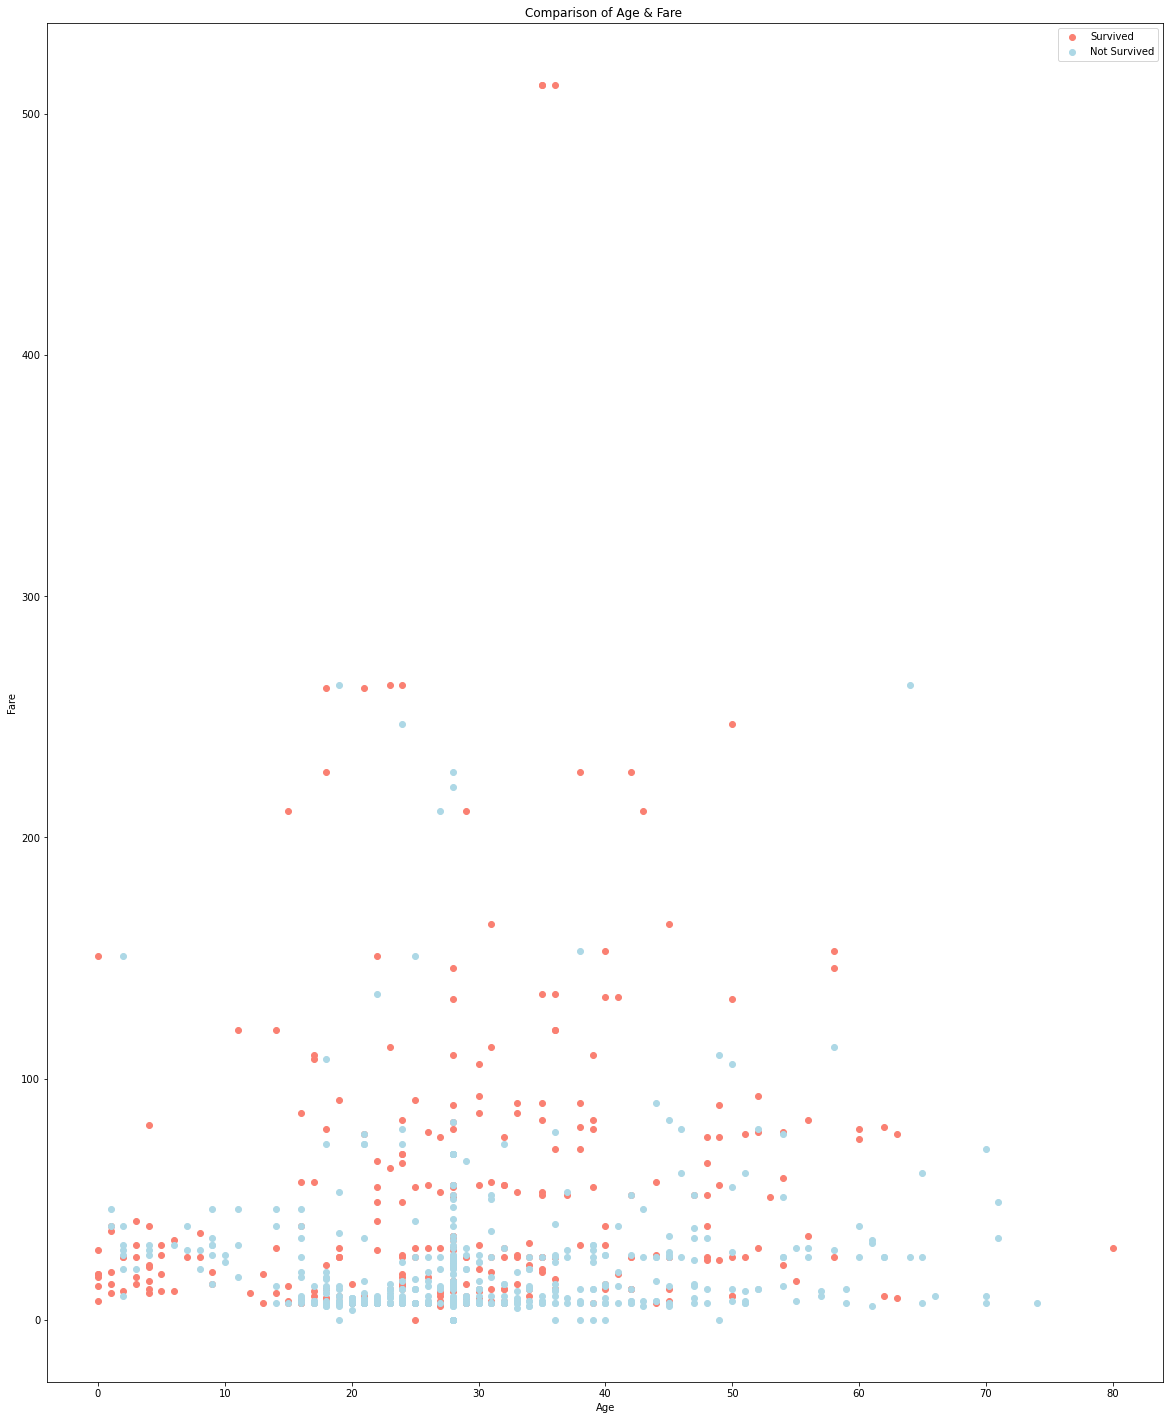

In [290]:
plt.figure(figsize=(20, 25))

# Scatter with postivie examples
plt.scatter(df.Age[df.Survived==1],
            df.Fare[df.Survived==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Survived==0],
            df.Fare[df.Survived==0],
            c="lightblue")


plt.title("Comparison of Age & Fare ")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["Survived", "Not Survived"]);

# Preprocessing the Test data

In [291]:
df_1 = pd.read_csv("test.csv")

In [292]:
df_1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [293]:
df_1['Fare'].fillna(value = np.mean(df_1['Fare']), inplace=True)
df_1["Age"].fillna(df_1['Age'].median(), inplace = True)
df_1['Cabin'].fillna(value="Unkn", inplace=True)

In [294]:
for label, content in df_1.items():
    if pd.api.types.is_string_dtype(content):
        df_1[label] = content.astype("category").cat.as_ordered()
        
for label, content in df_1.items():
    if pd.api.types.is_float_dtype(content):
        df_1[label] = content.astype("int64")

for label, content in df_1.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df_1[label] = pd.Categorical(content).codes+1          

In [295]:
df_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,2,34,0,0,153,7,77,2
1,893,3,404,1,47,1,0,222,7,77,3
2,894,2,270,2,62,0,0,74,9,77,2
3,895,3,409,2,27,0,0,148,8,77,3
4,896,3,179,1,22,1,1,139,12,77,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27,0,0,268,8,77,3
414,1306,1,284,1,39,0,0,325,108,23,1
415,1307,3,333,2,38,0,0,347,7,77,3
416,1308,3,385,2,27,0,0,221,8,77,3


In [296]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int16
 3   Sex          418 non-null    int8 
 4   Age          418 non-null    int64
 5   SibSp        418 non-null    int64
 6   Parch        418 non-null    int64
 7   Ticket       418 non-null    int16
 8   Fare         418 non-null    int64
 9   Cabin        418 non-null    int8 
 10  Embarked     418 non-null    int8 
dtypes: int16(2), int64(6), int8(3)
memory usage: 22.6 KB


In [297]:
# Make predictions on the test dataset using the best model
test_preds = rs_rf.predict(df_1)

In [298]:
test_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [299]:
# Create DataFrame compatible with Kaggle submission requirements
df1_preds = pd.DataFrame()
df1_preds["PassengerId"] = df_1["PassengerId"]
df1_preds["Survived"] = test_preds
df1_preds

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [300]:
df1_preds.to_csv("../Water quality/submission.csv",index=False)